In [1]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X_train = np.array([[0.5, 1.5], [.6,.75], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5], [2.5, 1.5]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1])

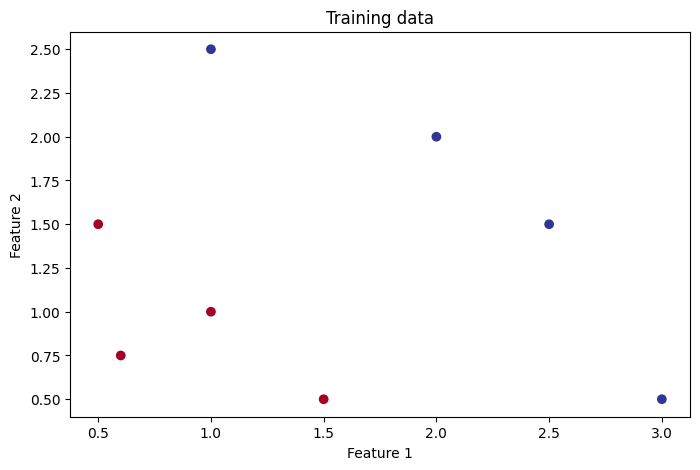

In [9]:
plt.figure(figsize=(8, 5))

plt.title('Training data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
def sigmoid(x):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-x))

## Cost Logistic Regression

In [11]:
def get_cost_logistic_regression(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    a = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    return cost

## Logistic Gradient Descent

In [12]:
def get_grandient_logistic(X, y, w, b):
    m, n = X.shape
    d_dw = np.zeros(w.shape)
    d_db = 0

    for i in range(m):
        y_hat = sigmoid(np.dot(w, X[i]) + b)
        error = y_hat - y[i]
        for j in range(n):
            d_dw[j] += error * X[i][j]
        d_db += error

    d_dw /= m
    d_db /= m

    return d_dw, d_db

In [13]:
def get_gradient_descent(X, y, w_in, b_in, alpha, num_iter):
    # An array to store the cost function values
    J = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iter):
        d_dw, d_db = get_grandient_logistic(X, y, w, b)

        w = w - alpha * d_dw
        b = b - alpha * d_db

        if i < 1000000: # prevent resource exhaustion
            J.append(get_cost_logistic_regression(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i}: Cost = {J[-1]}")

    return w, b, J

### Runing Test

In [14]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = get_gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration 0: Cost = 0.6814866737263827
Iteration 1000: Cost = 0.13539410699984694
Iteration 2000: Cost = 0.07381173232464065
Iteration 3000: Cost = 0.0507407047759654
Iteration 4000: Cost = 0.03868417728527178
Iteration 5000: Cost = 0.031274198173315386
Iteration 6000: Cost = 0.02625718046790502
Iteration 7000: Cost = 0.022634058818890933
Iteration 8000: Cost = 0.01989409453073212
Iteration 9000: Cost = 0.017749006363703107

updated parameters: w:[5.03040469 4.80919804], b:-13.488871642723131


### Plot

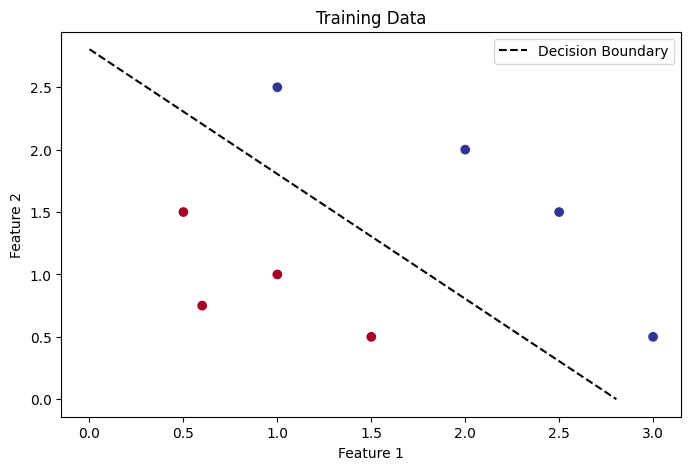

In [15]:
plt.figure(figsize=(8, 5))

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')

# Plot the decision boundary
x0 = -b_out / w_out[0]
x1 = -b_out / w_out[1]
plt.plot([0, x1], [x1, 0], 'k--', label='Decision Boundary')
plt.legend()

# Predict

if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$

In [16]:
def predict(X, w, b):
    """Make predictions using the logistic regression model"""
    z = np.dot(X, w) + b
    predictions = sigmoid(z)
    predictions[predictions >= 0.5] = 1
    predictions[predictions < 0.5] = 0
    return predictions

In [23]:
def accuracy(y_true, y_pred):
    """Calculate the accuracy of the predictions"""
    return np.mean(y_true == y_pred)

# Running

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6, 2), (2, 2), (6,), (2,))

In [19]:
# Train the model
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 0.1
iters = 10000
w_out, b_out, _ = get_gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration 0: Cost = 0.6836231962539023
Iteration 1000: Cost = 0.16058815460335124
Iteration 2000: Cost = 0.08541524187152706
Iteration 3000: Cost = 0.05754170026754142
Iteration 4000: Cost = 0.043234367692968206
Iteration 5000: Cost = 0.03457415009569861
Iteration 6000: Cost = 0.028782936240572446
Iteration 7000: Cost = 0.024643062963684827
Iteration 8000: Cost = 0.021538766733987885
Iteration 9000: Cost = 0.019125867279709767

updated parameters: w:[5.27999895 5.06122533], b:-14.20024317316942


In [21]:
# Make predictions on the test set
y_pred = predict(X_test, w_out, b_out)
y_pred

array([0., 1.])

In [24]:
# Evaluate the model
acc = accuracy(y_test, y_pred)
print(f"Test Accuracy: {acc}")

Test Accuracy: 1.0


## Plot

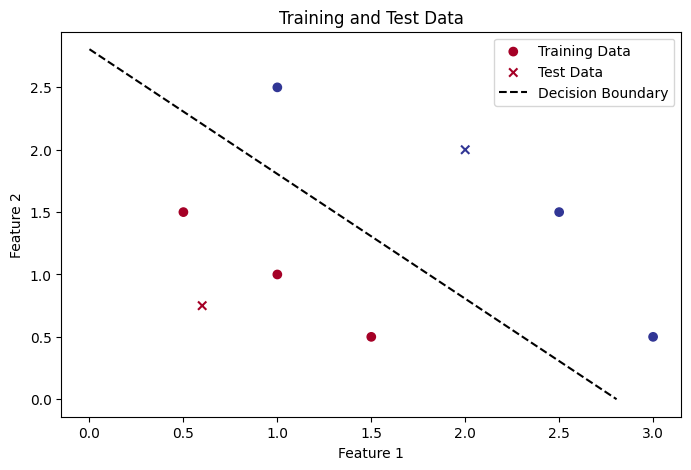

In [25]:
plt.figure(figsize=(8, 5))

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, label='Training Data')
# Plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, marker='x', label='Test Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Test Data')
plt.legend()

# Plot the decision boundary
x0 = -b_out / w_out[0]
x1 = -b_out / w_out[1]
plt.plot([0, x1], [x1, 0], 'k--', label='Decision Boundary')
plt.legend()

plt.show()